### Plotting leadfraction from neXtSIM simulations and Arcleads from Willmes et al., (2015)

#### Author: Jonathan Rheinlænder*
#### Date: Aug. 27 2021
#### Affiliation: Nansen Environmental and Remote Sensing Center, Bergen, Norway
*jonathan.rheinlaender@nersc.no

In [1]:
%matplotlib notebook
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import cartopy
import cartopy.crs as ccrs
import os
from pynextsim.projection_info import ProjectionInfo
import cmocean as cm
import datetime as dt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.axes_grid1.colorbar import colorbar

/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  app.launch_new_instance()


In [6]:
# plotting
def prepare_grid(ds):
    
    # Get x-y grid from model
    lons = ds.longitude[:]
    lats = ds.latitude[:]
    x,y=proj.pyproj(lons.values, lats.values) # init grid using x,y coords of grid
    x_extent = [(x,y)[0][0][0], (x,y)[0][0][-1]]
    y_extent = [(x,y)[1][0][0], (x,y)[1][-1][0]]
    ex_lim=1
    x_extent = [(x,y)[0][0][ex_lim], (x,y)[0][0][-ex_lim]]
    y_extent = [(x,y)[1][ex_lim][0], (x,y)[1][-ex_lim][0]]

    grid = dict(
        extent=extent,
        proj=proj,
        x_extent=x_extent,
        y_extent=y_extent,
        )

    return grid

def plotLeadMap(ax, ds, dto, add_colorbar=True, **cbargs):
    # define colors
    col_dict={0:"darkgrey",
              1:"black",
              2:"ghostwhite",
              3:"peru",
              4:"mediumblue"}

    # We create a colormar from our list of colors
    cm = ListedColormap([col_dict[x] for x in col_dict.keys()])

    # get colorbar tick labels 
    attr = ds.attrs['surface classes']

    labels={0:"land",
            1:"clouds",
            2:"sea ice",
            3:"artifact",
            4:"lead"}

    len_lab = len(labels)

    # prepare normalizer
    ## Prepare bins for the normalizer
    norm_bins = np.sort([*col_dict.keys()]) + 0.
    norm_bins = np.insert(norm_bins, 5, np.max(norm_bins) + 1.0)

    ## Make normalizer and formatter
    norm = mpl.colors.BoundaryNorm(norm_bins, len_lab, clip=True)
    fmt = mpl.ticker.FuncFormatter(lambda x, pos: labels[norm(x)])

    # prepare plot
    lons = ds.longitude.transpose()
    lats = ds.latitude.transpose()
    leadMap = ds.leadMap.transpose()
    
    #ax = plt.subplot(axes, projection=grid['proj'].crs, extent=grid['extent'])
    ax.add_feature(cartopy.feature.LAND,zorder=1,alpha=1, facecolor="darkgrey")
    ax.coastlines(resolution='50m', linewidth=0.5)
    ax.set_aspect(1)
    ax.gridlines(zorder=2,linewidth=0.5, alpha=0.5,linestyle="--")
    #ax.set_title('ArcLeads $-$ ' + dt.datetime.strftime(dto,'%Y-%m-%d'))
    ax.set_extent([-100, -50, 67, 87], ccrs.PlateCarree(central_longitude=300))

    im = ax.pcolormesh(lons, lats, leadMap, transform=ccrs.PlateCarree(), cmap=cm, norm=norm)

    # add title inside subplots
    ax.text(0.03,0.05,dt.datetime.strftime(dto,'%Y-%m-%d'),horizontalalignment='left',
        transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='None', alpha=0.75))

    
    if add_colorbar:
        diff = norm_bins[1:] - norm_bins[:-1]
        tickz = norm_bins[:-1] + diff / 2
        cax = inset_axes(ax,
                    width="5%",  # width = 50% of parent_bbox width
                    height="100%",  # height : 5%
                    loc='lower left',
                    bbox_to_anchor=(1.05, 0., 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=0)

        out = plt.colorbar(im, cax=cax, format=fmt, ticks=tickz)

    return fig,ax

def plot_nextsim(ax, grid, array, dto, clevs, cmap, add_colorbar=True, **cbargs):
    
    cs = ax.contourf(array, zorder=1, extent=[*grid['x_extent'], *grid['y_extent']],
             levels=clevs, cmap=cmap, extend='neither')

    ax.add_feature(cartopy.feature.LAND,zorder=1,alpha=1, color="darkgrey")
    ax.coastlines(resolution='50m', linewidth=0.5)
    ax.set_aspect(1)
    ax.gridlines(zorder=2,linewidth=0.5, alpha=0.5,linestyle="--")
    ax.set_extent([-100, -50, 67, 87], ccrs.PlateCarree(central_longitude=300))
    
    # add title inside subplots
    ax.text(0.03,0.05,dt.datetime.strftime(dto,'%Y-%m-%d'),horizontalalignment='left',
        transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='None', alpha=0.75))

    # add colorbar 
    if add_colorbar:
        cax = inset_axes(ax,
                    width="5%",  # width = 50% of parent_bbox width
                    height="100%",  # height : 5%
                    loc='lower left',
                    bbox_to_anchor=(1.05, 0., 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=0)

        out = plt.colorbar(cs, cax=cax, **cbargs)

<IPython.core.display.Javascript object>


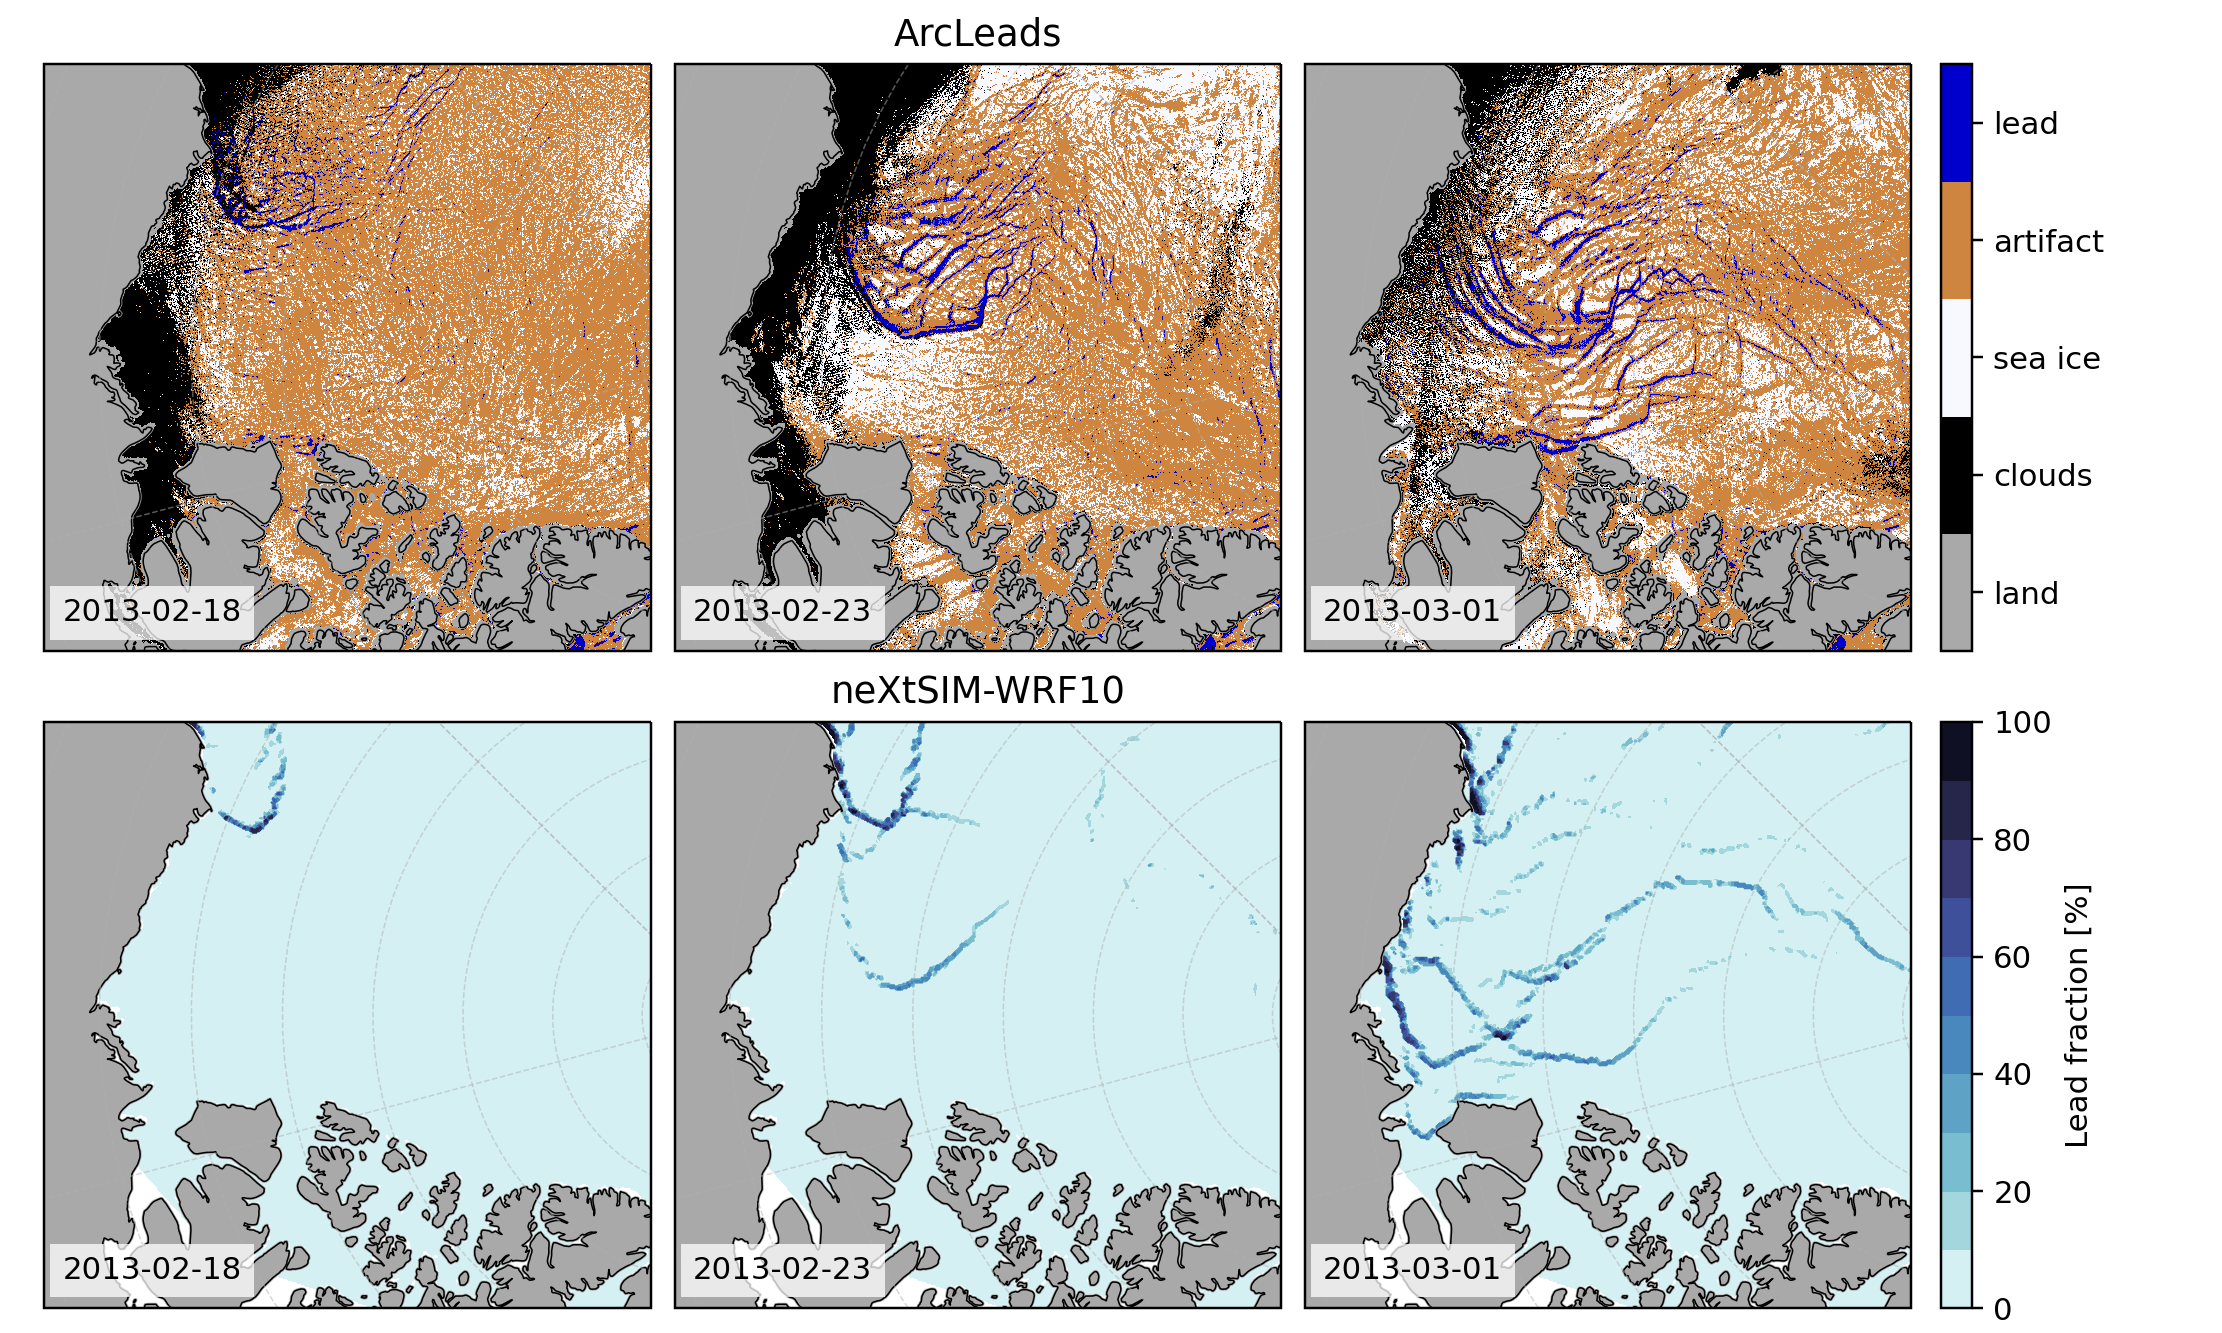

0 3
Loading  /cluster/home/rheinlender/data/ArcLeads/ArcLeads_20130218.nc
1 3
Loading  /cluster/home/rheinlender/data/ArcLeads/ArcLeads_20130223.nc
2 3
Loading  /cluster/home/rheinlender/data/ArcLeads/ArcLeads_20130301.nc


/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


saving  /cluster/home/rheinlender/projects/aoi_case_study/python/breakup-paper/figs/ArcLeads_wrf10_multipledates.png


In [8]:
# Plot multiple days in subplot

plt.close('all')

extent = [-110, 200, 67, 90]
proj = ProjectionInfo() # default nextsim projection
grid=prepare_grid(mooring)

# ArcLeads
indir= '/cluster/home/rheinlender/data/ArcLeads/';
outpath_plots = '/cluster/home/rheinlender/projects/aoi_case_study/python/plots/wrf/'
latlon_grid =  xr.open_dataset(indir + 'latlonmap.nc')

# dates to plot
dates = (dt.datetime(2013,2,18), dt.datetime(2013,2,23), dt.datetime(2013,3,1) )

## What variable to plot
varname = 'sic_thin'
if varname=='hfs':
    cbargs = {"label": 'Heat Flux [W m$^{-2}$]'}
    clevs = np.arange(0, 300+10, 10) # for Heat Fluxes
    cmap='rainbow'
elif varname=='sic_thin':
    clevs = np.arange(0, 100+10, 10) # for sic
    cbargs = {"label": "Lead fraction [%]"}
    cmap=cm.cm.ice_r
    
# Make subplot    
fig, ax = plt.subplots(2,3, figsize=(10,6), constrained_layout=True,
                       subplot_kw={'projection': grid['proj'].crs, 'extent': grid['extent']})

j = len(dates)
for i in range(0, len(dates)):
    print(i, j)
    dto = dates[i]
    
    # Open ArcLeads
    filename = indir + 'ArcLeads_' + str(dt.datetime.strftime(dto,'%Y%m%d')) + '.nc'
    print("Loading ", filename)
    ds = xr.open_dataset(filename)     
    ds['longitude'] = latlon_grid['longitude']
    ds['latitude'] = latlon_grid['latitude']

    # compute heat flux (snapshot - 3hourly)
    hfs = mooring['hfs'].sel(time=dt.datetime.strftime(dto,'%Y-%m-%d'))
    hfs=hfs[0] # pick first date
    
    # Compute Thin ice conc + open water
    sic_thin = 1-mooring['sic'] + mooring['sic_thin']
    sic_thin = sic_thin.sel(time=dt.datetime.strftime(dto,'%Y-%m-%d'))[0]*100 # in %
    
    if i==2:
        kw = dict(add_colorbar=True)
    else: 
        kw = dict(add_colorbar=False)
        
    fig1,ax1 = plotLeadMap(ax[0, i], ds, dto, **kw, **cbargs)    # upper panel    
    plot_nextsim(ax[1,i], grid, sic_thin, dto, clevs,cmap, **kw, **cbargs)     # lower panel

fig.subplots_adjust(bottom=0.01, top=0.96, left=0.02, right=0.86, wspace=0.04, hspace=0.08)
plt.show()

# add titles
ax[0,1].set_title('ArcLeads')
ax[1,1].set_title('neXtSIM-WRF10')

# save figure
outpath_plots = '/cluster/home/rheinlender/projects/aoi_case_study/python/breakup-paper/figs/'
figname = outpath_plots+'ArcLeads_wrf10_multipledates' + '.png'
print("saving ", figname)
fig.savefig(figname, dpi=150)   